In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dt = 0.001
t = np.arange(0,1,dt)
n = len(t)
f_clean = np.sin(2*np.pi*50*t) + np.cos(2*np.pi*100*t) + np.sin(2*np.pi*200*t)      # Clean Signal
f = f_clean + np.random.normal(0,1, n)                                              # Added Noise

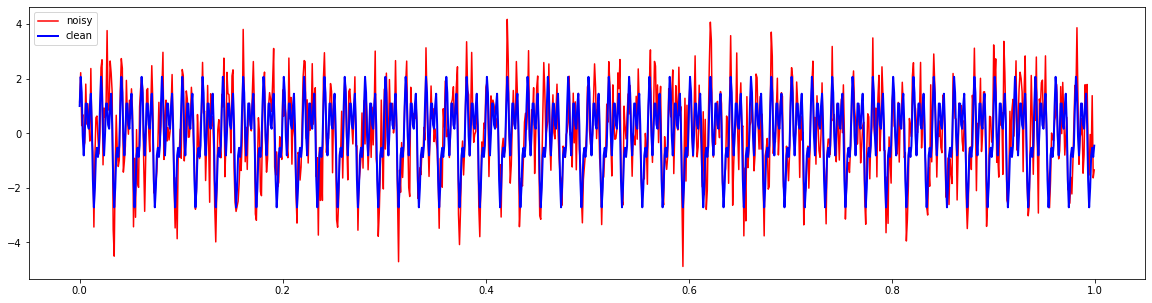

In [22]:
#Plotting
# fig, ax = plt.subplot(2,1)
# plt.figure(figsize=(20,5))  # Only for a particular plot

plt.rcParams['figure.figsize'] = [20, 5] # For all the plots

# plt.sca(ax[0])
plt.plot(t, f, label="noisy", color='r')
plt.plot(t, f_clean, label="clean", linewidth=2, color='b')
# plt.xlim(t[0],t[-1])
plt.legend()

/home/anirbankopty/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


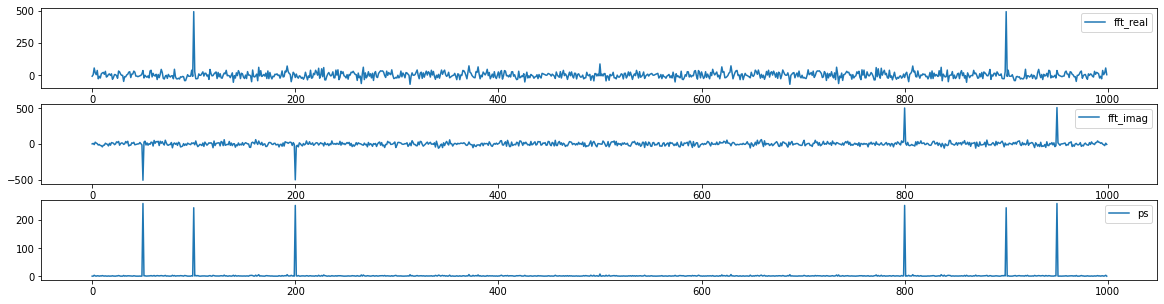

In [23]:
#going to the Fourier Domain
fft = np.fft.fft(f)
freq = np.arange(n) /  1    # / length of t
ps = fft * np.conjugate(fft) /n

fig, ax = plt.subplots(3,1)
plt.sca(ax[0])
plt.plot(freq, np.real(fft), label='fft_real')
plt.legend()

plt.sca(ax[1])
plt.plot(freq, np.imag(fft), label='fft_imag')
plt.legend()

plt.sca(ax[2])
plt.plot(freq, ps, label='ps')
# plt.xlim(freq[0], freq[-1])

plt.legend()

/home/anirbankopty/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/anirbankopty/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


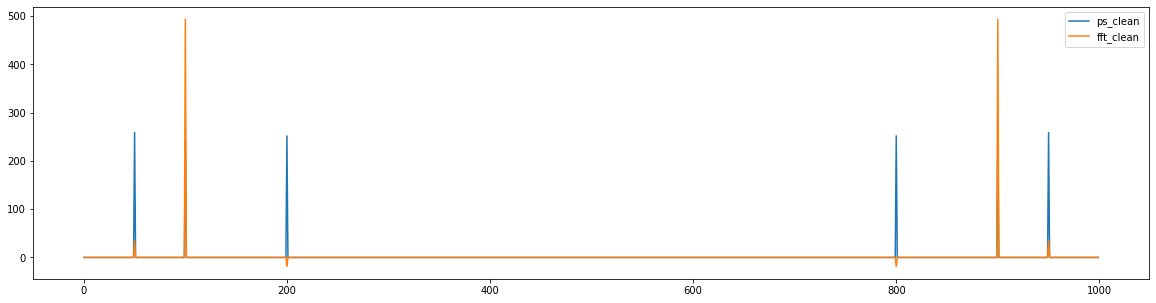

In [24]:
# picking up the peaks
boolean = ps > 150
ps_clean = ps * boolean
fft_clean = fft * boolean

# plt.plot(freq, np.transpose([fft, fft_clean]))
plt.plot(freq, ps_clean, label='ps_clean')
plt.plot(freq, fft_clean, label='fft_clean')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/anirbankopty/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


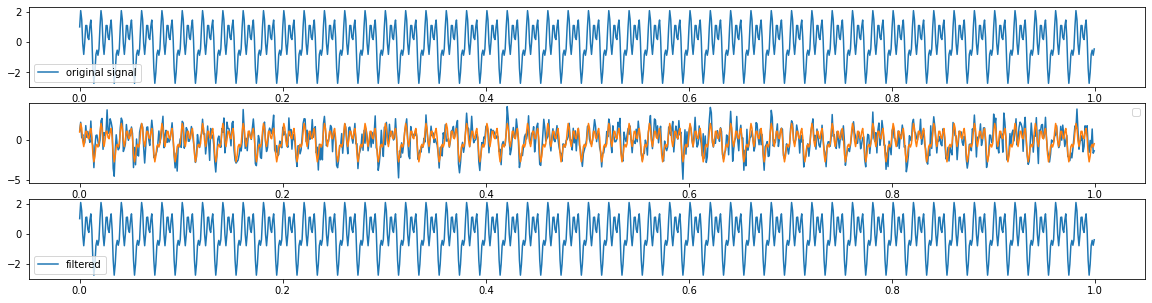

In [25]:
ifft = np.fft.ifft(fft_clean)

fig, ax = plt.subplots(3,1)

ax[0].plot(t, f_clean, label='original signal')
ax[0].legend()

ax[1].plot(t, np.transpose([f, f_clean]))
ax[1].legend()

ax[2].plot(t, ifft, label='filtered')
ax[2].legend()